In [1]:
import pandas as pd

df = pd.read_csv('../Data/ultimate/Ultimate_AAPL_filtered.csv')
df['test'] = (df['Close_price-today'] - df['Close_price-tmr'])/df['Close_price-tmr']


In [9]:
df.head(5)


,post_date,comment_num,retweet_num,like_num,follower_count,compound_score,Close_price-today,Close_price-tmr,Close_price-2days,test
0,2015-01-04 21:04:38,0,0,0,1161,0.5562,26.5625,26.565001,26.9375,-0.000094
1,2015-01-04 21:07:58,0,0,1,218,0.2500,26.5625,26.565001,26.9375,-0.000094
2,2015-01-04 21:08:09,0,0,1,1099,0.0000,26.5625,26.565001,26.9375,-0.000094
3,2015-01-04 21:10:46,0,0,0,1070,-0.1027,26.5625,26.565001,26.9375,-0.000094
4,2015-01-04 21:13:34,1,3,6,259879,0.0000,26.5625,26.565001,26.9375,-0.000094


In [6]:
print(df['test'].mean())
print(df['test'].max())
print(df['test'].std())

-0.0014044489294244018
0.11062659510157972
0.01641400984521232


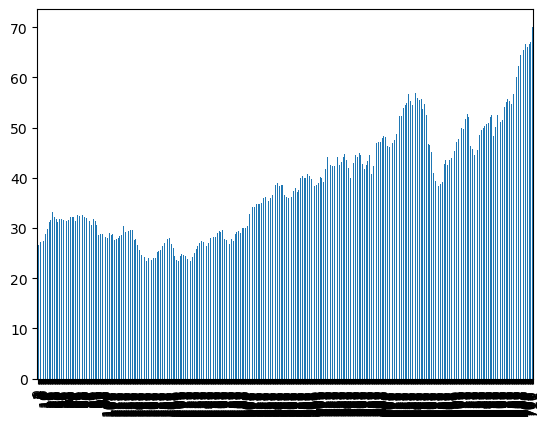

In [8]:
import matplotlib.pyplot as plt
# get all the unique values of the column 'Close_price-today' and plot them
close_prices = pd.Series(df['Close_price-today'].unique())
close_prices.plot(kind='bar')

plt.show()


In [34]:
df = pd.read_csv('../Data/new/AAPL_Finance.csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by date in ascending order
df = df.sort_values('Date', ascending=True)

# Create a new column 'Delta' to store the price delta
df['Delta'] = df['Close'].shift(-1) - df['Close']

# Drop the last row since there is no next day's price for it
df = df[:-1]

df.head(5)
df.to_csv('../Data/new/AAPL_summary.csv', index=False)

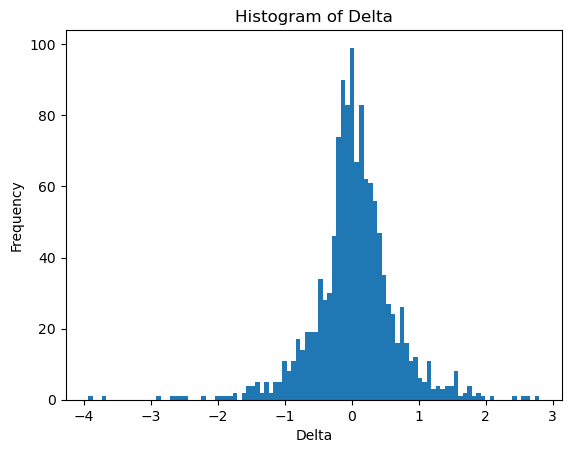

In [20]:
plt.hist(df['Delta'], bins=100)
plt.title('Histogram of Delta')
plt.xlabel('Delta')
plt.ylabel('Frequency')
plt.show()


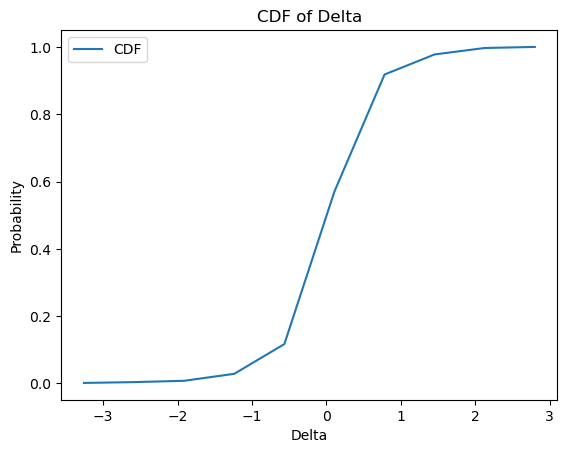

In [32]:
import numpy as np

# delta = df['Delta']

# delta_sorted = np.sort(delta)

# getting data of the histogram
delta, bins_count = np.histogram( df['Delta'], bins=10)
  
# finding the PDF of the histogram using count values
pdf = delta / sum(delta)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
# plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.title('CDF of Delta')
plt.xlabel('Delta')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()